In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
df = pd.read_csv(r'F:\Study\Machine Learning\datasets\house-prices-advanced-regression-techniques\train.csv')

In [3]:
df.head(6)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  

[6 rows x 81 columns]

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12        

In [7]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [8]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
df2_msv_pr = df.isnull().sum()/df.shape[0]*100

In [10]:
df3_dc = df2_msv_pr[df2_msv_pr>20].keys()

In [11]:
df3_dc

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [12]:
# drop column 
df_dr_clm = df.drop(columns=df3_dc)

In [13]:
df_dr_clm.shape

(1460, 76)

<AxesSubplot:>

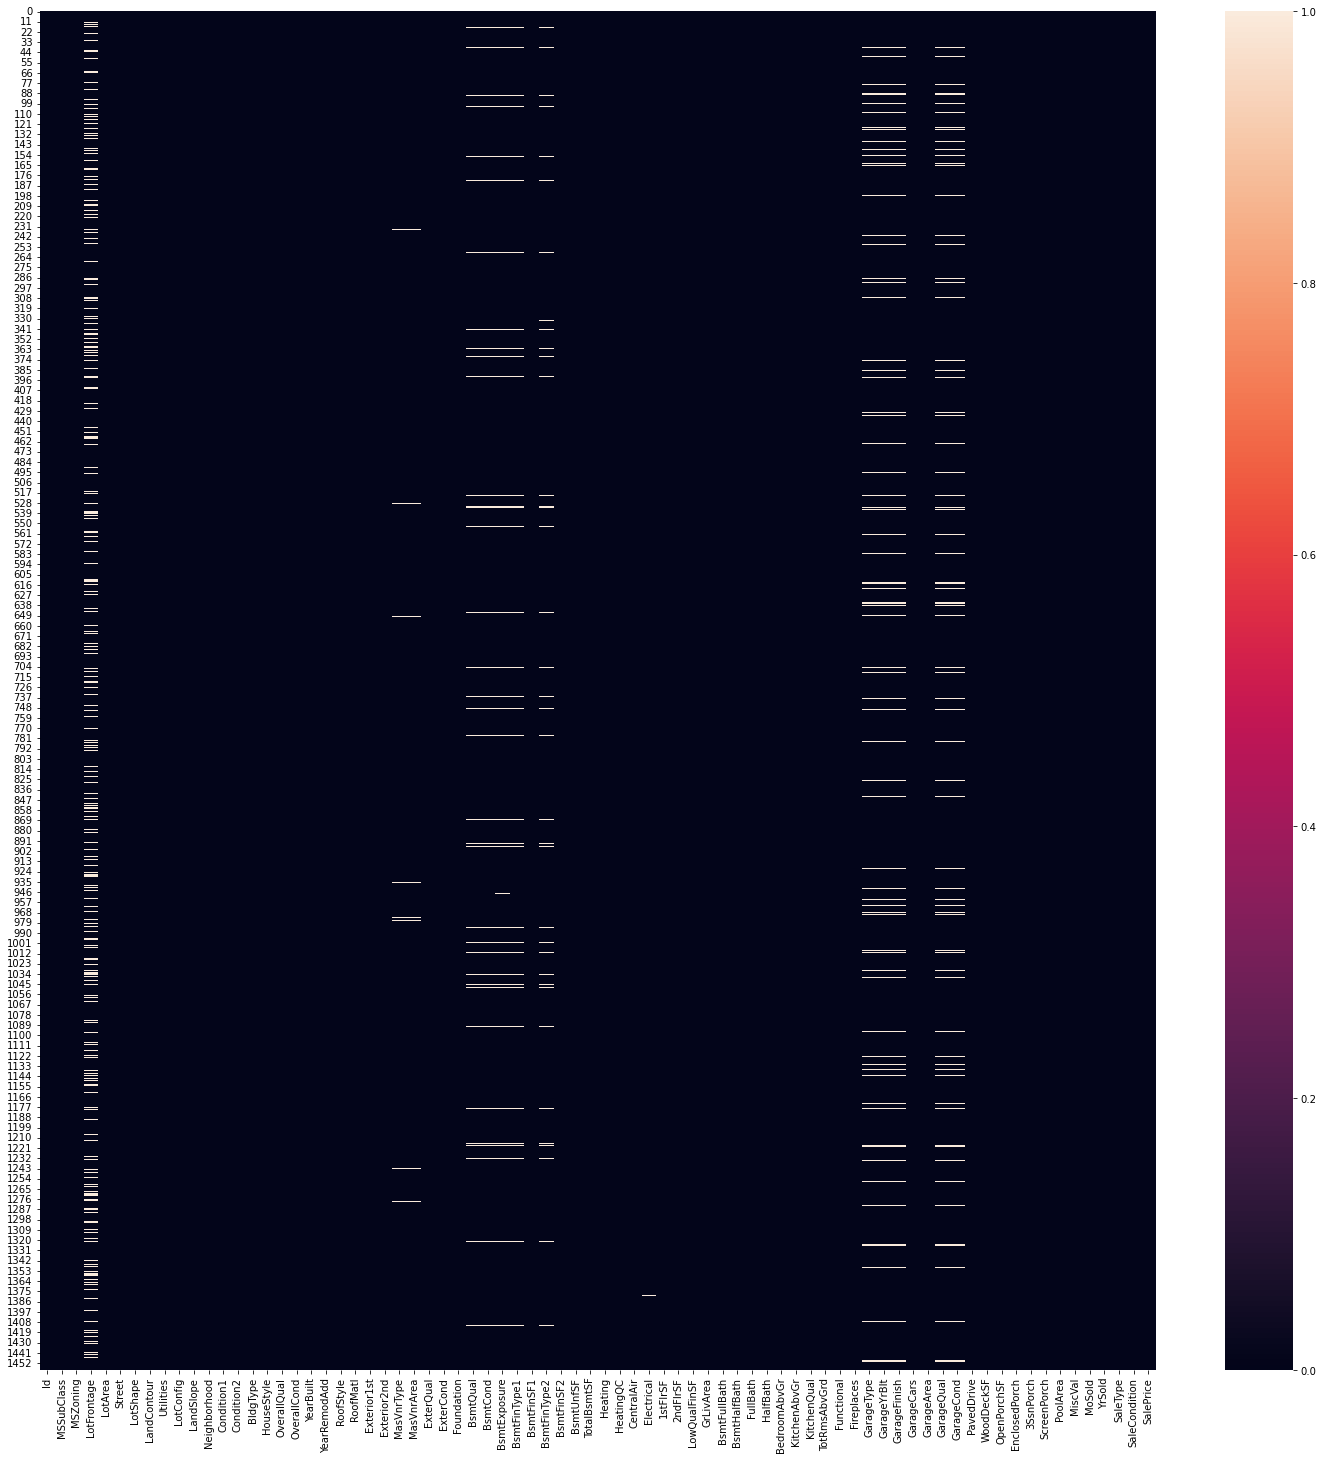

In [14]:
# heatmap
plt.figure(figsize=(25,25))
sns.heatmap(df_dr_clm.isnull())

In [15]:
df4_num_clm = df_dr_clm.select_dtypes(include=['int64', 'float64'])
df4_num_clm

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
5        6          50         85.0    14115            5            5   
6        7          20         75.0    10084            8            5   
7        8          60          NaN    10382            7            6   
8        9          50         51.0     6120            7            5   
9       10         190         50.0     7420            5            6   
10      11          20         70.0    11200            5            5   
11      12          60         85.0    11924            9            5   
12      13          20          NaN    12968            5            6   
13      14          20         91.0    10652            7            5   
14      15          20          NaN    10920            6            5   
15      16          45         51.0     6120            7            8   
16      17          20          NaN    11241            6            7   
17      18          90         72.0    10791            4            5   
18      19          20         66.0    13695            5            5   
19      20          20         70.0     7560            5            6   
20      21          60        101.0    14215            8            5   
21      22          45         57.0     7449            7            7   
22      23          20         75.0     9742            8            5   
23      24         120         44.0     4224            5            7   
24      25          20          NaN     8246            5            8   
25      26          20        110.0    14230            8            5   
26      27          20         60.0     7200            5            7   
27      28          20         98.0    11478            8            5   
28      29          20         47.0    16321            5            6   
29      30          30         60.0     6324            4            6   
30      31          70         50.0     8500            4            4   
31      32          20          NaN     8544            5            6   
32      33          20         85.0    11049            8            5   
33      34          20         70.0    10552            5            5   
34      35         120         60.0     7313            9            5   
35      36          60        108.0    13418            8            5   
36      37          20        112.0    10859            5            5   
37      38          20         74.0     8532            5            6   
38      39          20         68.0     7922            5            7   
39      40          90         65.0     6040            4            5   
40      41          20         84.0     8658            6            5   
41      42          20        115.0    16905            5            6   
42      43          85          NaN     9180            5            7   
43      44          20          NaN     9200            5            6   
44      45          20         70.0     7945            5            6   
45      46         120         61.0     7658            9            5   
46      47          50         48.0    12822            7            5   
47      48          20         84.0    11096            8            5   
48      49         190         33.0     4456            4            5   
49      50          20         66.0     7742            5            7   
50      51          60          NaN    13869            6            6   
51      52          50         52.0     6240            6            6   
52      53          90        110.0     8472            5            5   
53      54  

<AxesSubplot:>

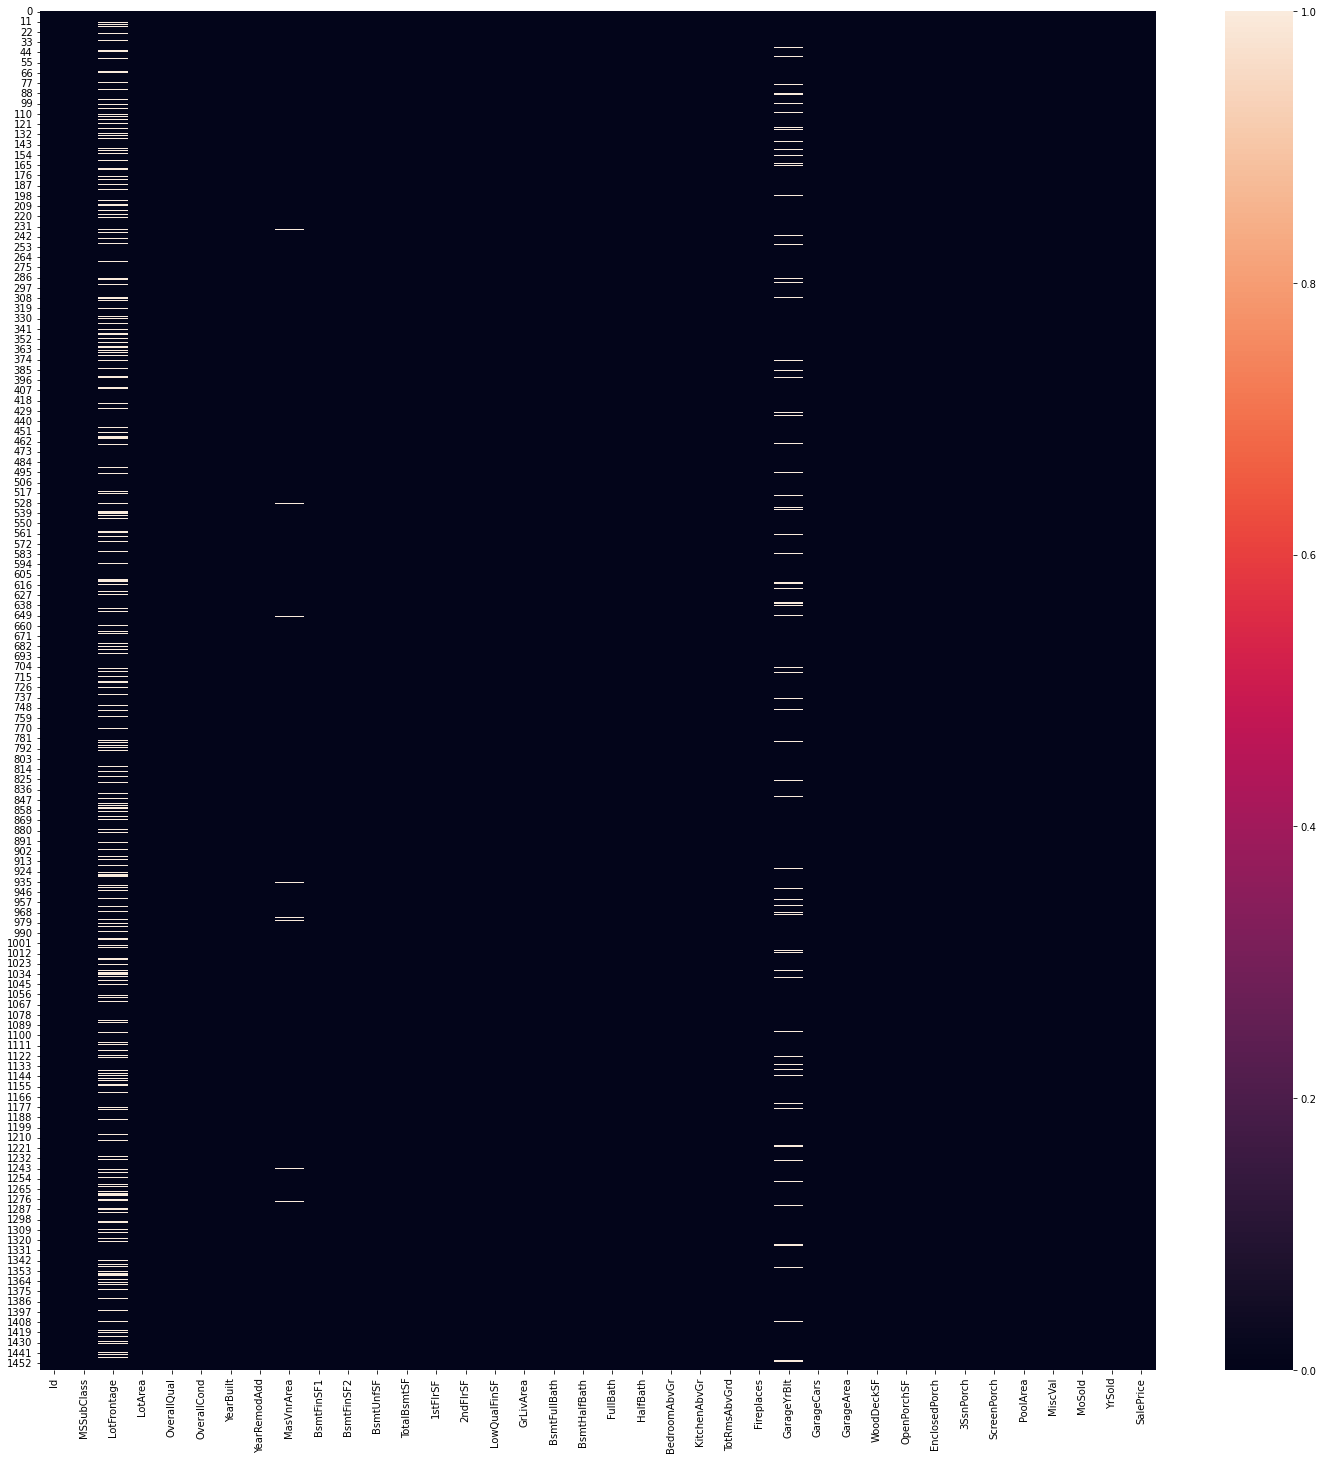

In [16]:
plt.figure(figsize=(25,25))
sns.heatmap(df4_num_clm.isnull())

In [17]:
df4_num_clm[df4_num_clm.isnull().any(axis=1)]

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
7        8          60          NaN    10382            7            6   
12      13          20          NaN    12968            5            6   
14      15          20          NaN    10920            6            5   
16      17          20          NaN    11241            6            7   
24      25          20          NaN     8246            5            8   
31      32          20          NaN     8544            5            6   
39      40          90         65.0     6040            4            5   
42      43          85          NaN     9180            5            7   
43      44          20          NaN     9200            5            6   
48      49         190         33.0     4456            4            5   
50      51          60          NaN    13869            6            6   
64      65          60          NaN     9375            7            5   
66      67          20          NaN    19900            7            5   
76      77          20          NaN     8475            4            7   
78      79          90         72.0    10778            4            5   
84      85          80          NaN     8530            7            5   
88      89          50        105.0     8470            3            2   
89      90          20         60.0     8070            4            5   
95      96          60          NaN     9765            6            8   
99     100          20         77.0     9320            4            5   
100    101          20          NaN    10603            6            7   
104    105          50          NaN     7758            7            4   
108    109          50         85.0     8500            5            7   
111    112          80          NaN     7750            7            5   
113    114          20          NaN    21000            6            5   
116    117          20          NaN    11616            5            5   
120    121          80          NaN    21453            6            5   
125    126         190         60.0     6780            6            8   
126    127         120          NaN     4928            6            5   
127    128          45         55.0     4388            5            7   
131    132          60          NaN    12224            6            5   
133    134          20          NaN     6853            8            5   
136    137          20          NaN    10355            5            5   
140    141          20         70.0    10500            4            5   
147    148          60          NaN     9505            7            5   
148    149          20         63.0     7500            7            5   
149    150          50          NaN     6240            5            4   
152    153          60          NaN    14803            6            5   
153    154          20          NaN    13500            6            7   
155    156          50         60.0     9600            6            5   
160    161          20          NaN    11120            6            6   
163    164          45         55.0     5500            4            6   
165    166         190         62.0    10106            5            7   
166    167          20          NaN    10708            5            5   
169    170          20          NaN    16669            8            6   
170    171          50          NaN    12358            5            6   
177    178          50          NaN    13650            5            5   
180    181         160          NaN     2117            6            5   
186    187          80          NaN     9947            7            5   
191    192          60          NaN     7472            7            9   
198    199          75         92.0     5520            6            6   
203    204         120          NaN     4438            6            5   
207    208          20          NaN    12493            4            5   
208    209  

In [18]:
df4_num_clm[df4_num_clm.isnull().any(axis=1)]

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
7        8          60          NaN    10382            7            6   
12      13          20          NaN    12968            5            6   
14      15          20          NaN    10920            6            5   
16      17          20          NaN    11241            6            7   
24      25          20          NaN     8246            5            8   
31      32          20          NaN     8544            5            6   
39      40          90         65.0     6040            4            5   
42      43          85          NaN     9180            5            7   
43      44          20          NaN     9200            5            6   
48      49         190         33.0     4456            4            5   
50      51          60          NaN    13869            6            6   
64      65          60          NaN     9375            7            5   
66      67          20          NaN    19900            7            5   
76      77          20          NaN     8475            4            7   
78      79          90         72.0    10778            4            5   
84      85          80          NaN     8530            7            5   
88      89          50        105.0     8470            3            2   
89      90          20         60.0     8070            4            5   
95      96          60          NaN     9765            6            8   
99     100          20         77.0     9320            4            5   
100    101          20          NaN    10603            6            7   
104    105          50          NaN     7758            7            4   
108    109          50         85.0     8500            5            7   
111    112          80          NaN     7750            7            5   
113    114          20          NaN    21000            6            5   
116    117          20          NaN    11616            5            5   
120    121          80          NaN    21453            6            5   
125    126         190         60.0     6780            6            8   
126    127         120          NaN     4928            6            5   
127    128          45         55.0     4388            5            7   
131    132          60          NaN    12224            6            5   
133    134          20          NaN     6853            8            5   
136    137          20          NaN    10355            5            5   
140    141          20         70.0    10500            4            5   
147    148          60          NaN     9505            7            5   
148    149          20         63.0     7500            7            5   
149    150          50          NaN     6240            5            4   
152    153          60          NaN    14803            6            5   
153    154          20          NaN    13500            6            7   
155    156          50         60.0     9600            6            5   
160    161          20          NaN    11120            6            6   
163    164          45         55.0     5500            4            6   
165    166         190         62.0    10106            5            7   
166    167          20          NaN    10708            5            5   
169    170          20          NaN    16669            8            6   
170    171          50          NaN    12358            5            6   
177    178          50          NaN    13650            5            5   
180    181         160          NaN     2117            6            5   
186    187          80          NaN     9947            7            5   
191    192          60          NaN     7472            7            9   
198    199          75         92.0     5520            6            6   
203    204         120          NaN     4438            6            5   
207    208          20          NaN    12493            4            5   
208    209  

In [19]:
df_dr_clm.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [20]:
df4_num_clm.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [21]:
df4_num_clm.shape

(1460, 38)

In [22]:
miss_vl_clm = [var for var in df4_num_clm.columns if df4_num_clm[var].isnull().sum()>0]

In [23]:
miss_vl_clm

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [24]:
missing_num_var = [var for var in df4_num_clm if df4_num_clm[var].isnull().sum()>0]

In [25]:
missing_num_var

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

C:\Users\Professor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Professor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Professor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

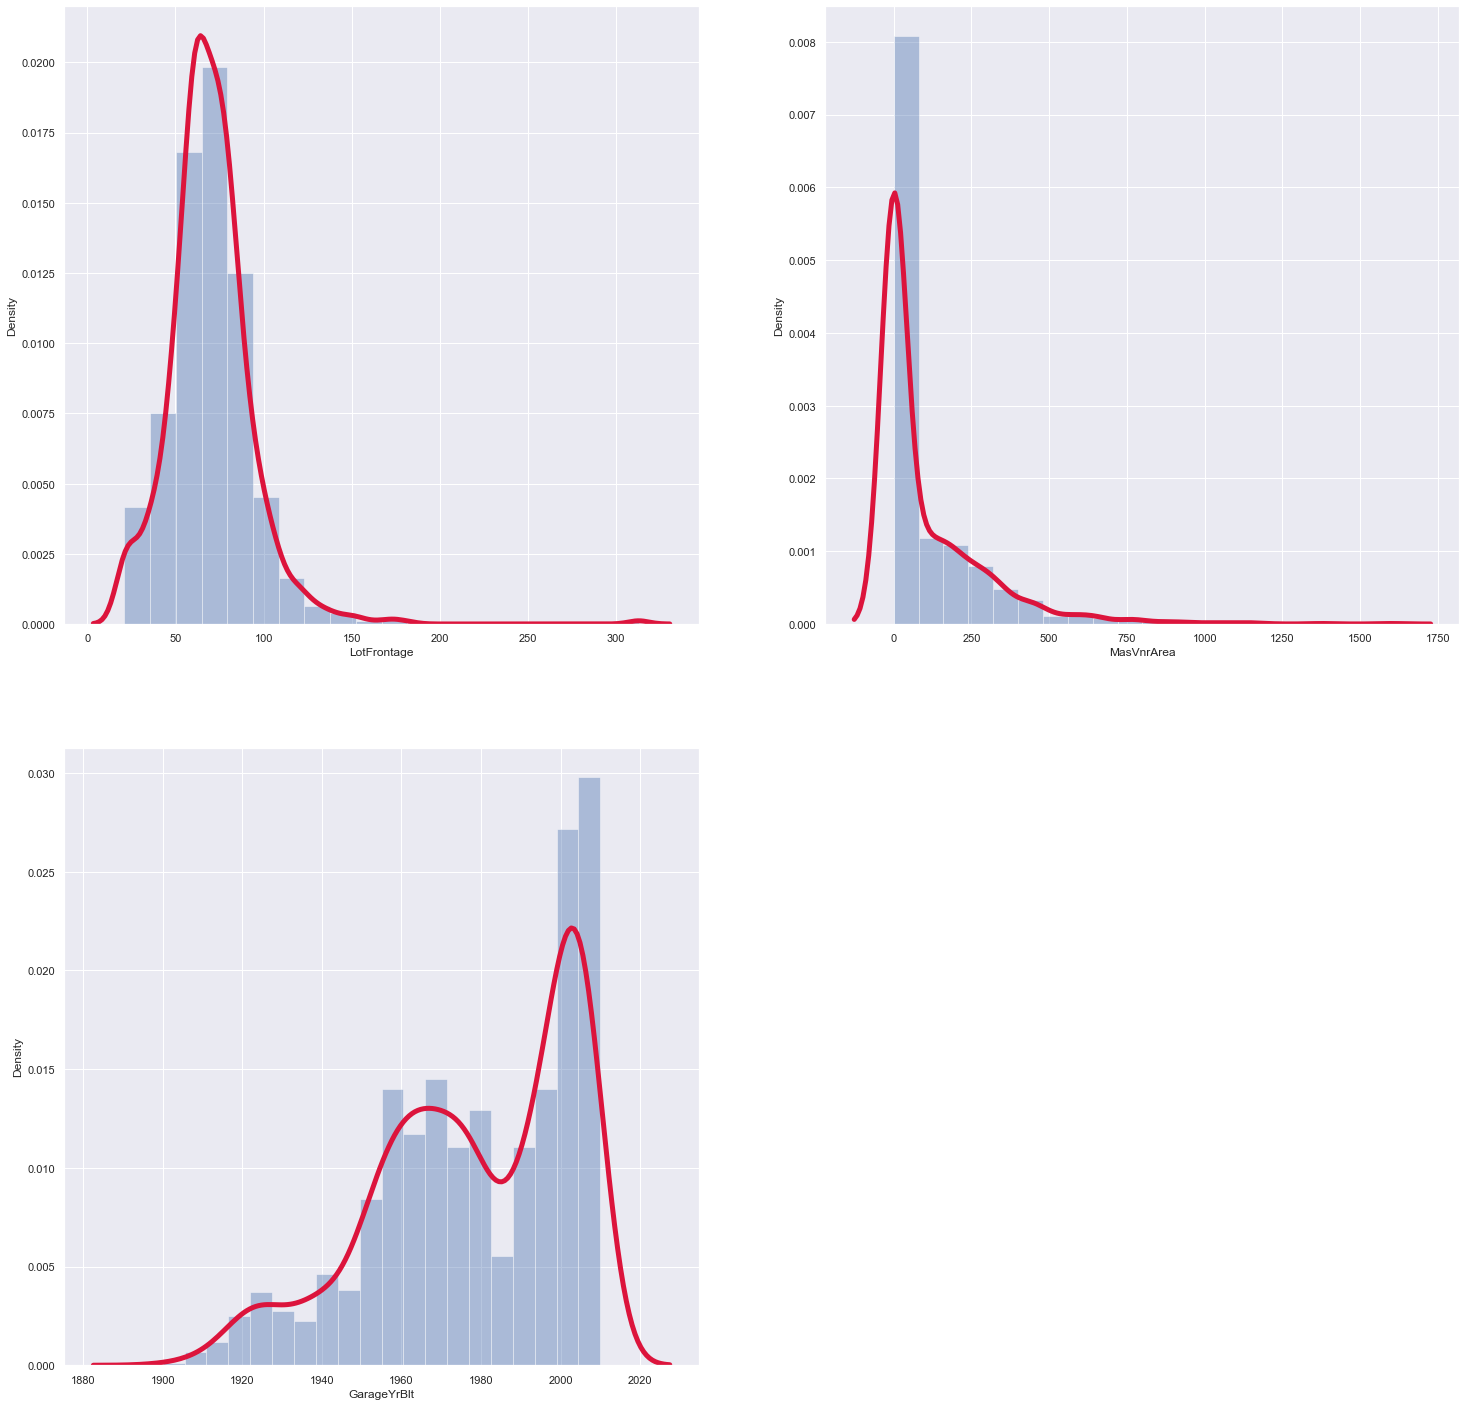

In [27]:
plt.figure(figsize=(25,25))
sns.set()
for i , var in enumerate (missing_num_var):
    plt.subplot(2,2, i+1)
    sns.distplot(df4_num_clm[var],bins = 20, kde_kws={'linewidth':5, 'color':'#DC143C'})

C:\Users\Professor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Professor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Professor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

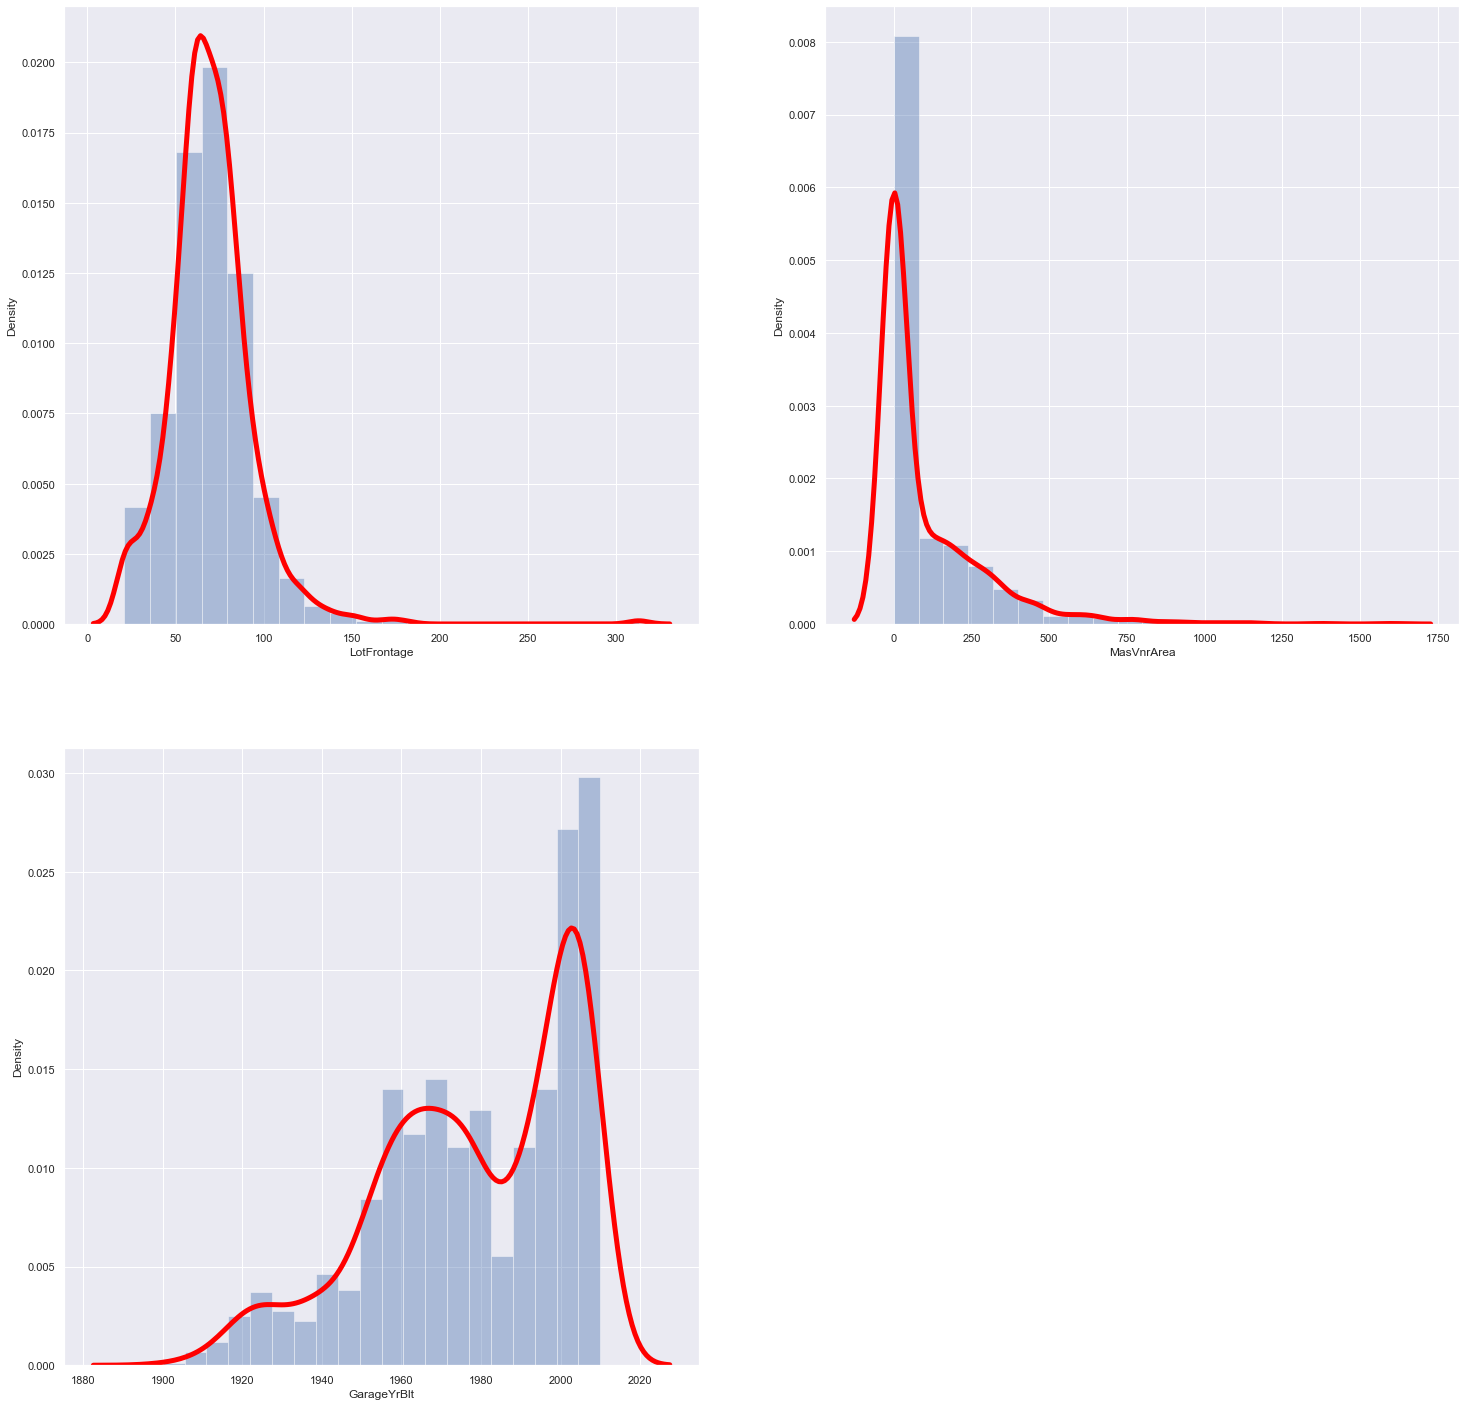

In [29]:
plt.figure(figsize=(25,25))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df4_num_clm[var], bins = 20, kde_kws={'linewidth':5, 'color':'red'})

In [30]:
# now fill NA value using mean
df5_num_mean = df4_num_clm.fillna(df4_num_clm.mean())

In [31]:
df5_num_mean.isnull().sum().sum()

0

C:\Users\Professor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Professor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Professor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

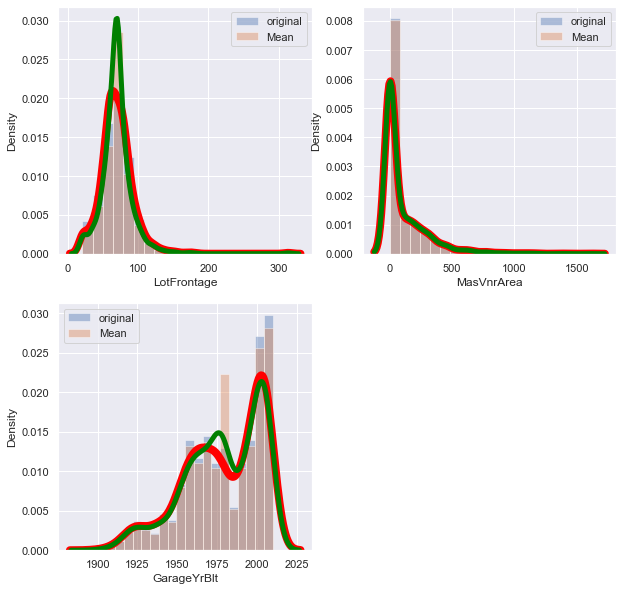

In [36]:
# now draw tha graph 
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2, i+1)
    sns.distplot(df4_num_clm[var], bins = 20, kde_kws={'linewidth':8, 'color':'red'}, label='original')
    sns.distplot(df5_num_mean[var], bins= 20, kde_kws={'linewidth':5, 'color':'green'},label="Mean")
    plt.legend()
    

In [37]:
df6_num_median = df4_num_clm.fillna(df4_num_clm.median())

In [38]:
df6_num_median.isnull().sum().sum()

0

C:\Users\Professor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Professor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Professor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

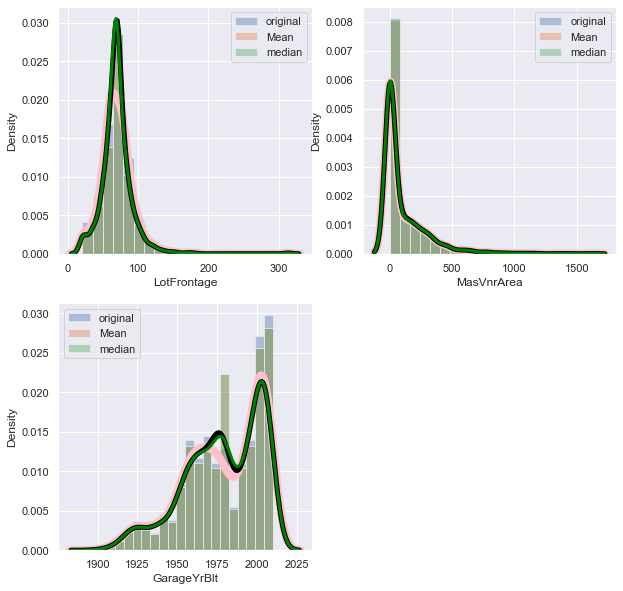

In [39]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(missing_num_var):
    plt.subplot(2,2,i+1)
    sns.distplot(df4_num_clm[var], bins = 20, kde_kws={'linewidth':8, 'color':'pink'}, label='original')
    sns.distplot(df5_num_mean[var], bins = 20, kde_kws={'linewidth':5, 'color':'black'}, label = 'Mean')
    sns.distplot(df6_num_median[var], bins = 20,kde_kws={'linewidth':3, 'color':'green'}, label= 'median')
    plt.legend()

C:\Users\Professor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'df4_num_mean' is not defined

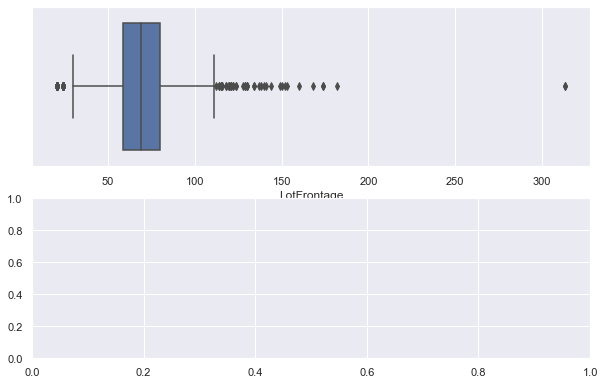

In [40]:
for i, var in enumerate(missing_num_var):
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,1)
    sns.boxplot(df[var])
    plt.subplot(3,1,2)
    sns.boxplot(df5_num_mean[var])
    plt.subplot(3,1,3)
    sns.boxplot(df5_num_median[var])